# Gershgorin Circle Theorem
Given a complex matrix \\(M\\), it's eigenvalues \\(\lambda_i\\) will lie in \\(\bigcup_i B(c_i, r_i)\\), where \\(B(c,r)\\) is a disk on a complex plane with center \\(c\\) and radius \\(r\\). \
Centers and radii are given as \\(c_i = M_{ii}\\) and \\(r_i = \sum_{j\neq i} |M_{ij}|\\). \
Moreover, if there are \\(k\\)-disks disjoint from the rest, their union will contain exactly \\(k\\) eigenvalues

In [72]:
import numpy as np
import numpy.linalg as la
import matplotlib.pyplot as plt

In [149]:
def randomMatrix(N, complx=True, r=1):
    """
    Generate a random matrix whose diagonal elements are r times larger than the rest
    
    Parameters
    ----------
    N - dimension of the matrix
    complx - if true created random matrix will be complex
    r - average ratio of diagonal elements to non-diagonal elements
    
    returns numpy.array of shape (N,N)   
    
    """
    mat = np.random.uniform(-1,1,(N,N)) + complx*np.random.uniform(-1,1,(N,N))*1j
    for i, row in enumerate(mat):
        row[i] = r*row[i]
        
    return mat

In [150]:
class Gershgorin():
    '''
    Gershgorin class is initialized using a matrix. 
    There are two main functions available to the user
    plot() and __str__()
    '''
    def __init__(self, Matrix):
        self.M = Matrix
        
        self.eigvals = la.eigvals(Matrix)
        self.centers = None
        self.radii = None
        self._circles()
        
    def plot(self):
        '''
        Plots Gershgorin circles, their centers and the eigenvalues of the matrix
        '''
        fig = plt.figure(figsize=(10,10))
        ax = fig.add_subplot(111)

        centerplot = ax.scatter(self.centers.T[0], self.centers.T[1], marker='x', zorder=3) #Plot centers on top

        eigvalplot = ax.scatter(self.eigvals.real, self.eigvals.imag, c='r', zorder=2) #Plot eigenvalues on top circles but under centers

        lightblue = (0,0,1,.1)
        for c, r in zip(self.centers, self.radii):
            circle = plt.Circle(c, r, fc=lightblue)
            ax.add_patch(circle)

        ax.axis('scaled') #Scale axes to fit everything that has been plotted
        ax.legend([circle, centerplot, eigvalplot], 
                  ['Gershgorin Circles', 'Circle Centers', 'Eigenvalues'])

        plt.show()
            
    def __str__(self):
        '''
        String representation can be used by calling a print function on an instance of the class.
        It will print the matrix, eigenvalues, centers and radii of the Gershgorin circles.
        Values are rounded to avoid clutter and ease readability.
        '''
        return 'M =\n {0}\n\n Eigenvalues:\n {1}\n\n Center coordiantes:\n {2}\n\n Center radii:\n {3}'.format(np.round(self.M,2).__str__(), 
                                                                                                       np.round(self.eigvals, 2), 
                                                                                                       self.centers.round(2), 
                                                                                                       self.radii.round(2))
    def _circles(self):
        '''
        Supplementary function for calculating Gershgorin circle centers and radii
        '''
        diagM = np.diagonal(self.M)

        centers = np.stack((diagM.real, diagM.imag)).T
        radii = np.abs(self.M).sum(axis=1) - np.abs(diagM)

        self.centers, self.radii = centers, radii

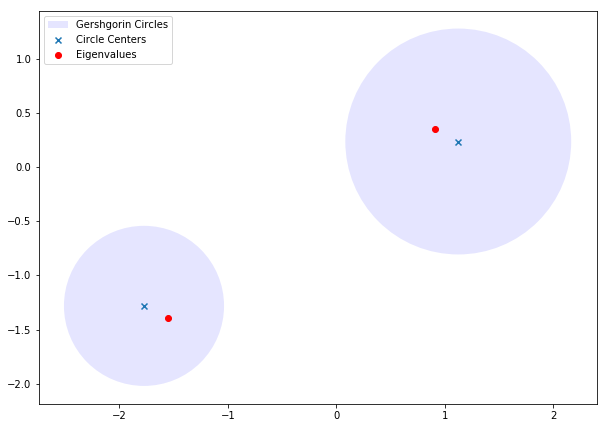

M =
 [[ 1.13+0.24j -0.6 +0.85j]
 [ 0.38+0.63j -1.77-1.28j]]

 Eigenvalues:
 [ 0.91+0.35j -1.56-1.39j]

 Center coordiantes:
 [[ 1.13  0.24]
 [-1.77 -1.28]]

 Center radii:
 [1.04 0.74]


In [159]:
M = Gershgorin(randomMatrix(2, r=2))
M.plot()
print(M)